# Lab 10: Central limit theorem, change detection, multidimensional Gaussian distribution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
from scipy.stats import multivariate_normal
print ('Modules Imported!')

Modules Imported!


## Gaussian Distribution and the Central Limit Theorem:

The Gaussian distribution (also known as the normal distribution) is a continuous type distribution and has a pdf defined by $f(u)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(\frac{(u-\mu)^2}{2\sigma^2}\right)$. The mean is given by $\mu$ and the variance is given by $\sigma^2$. Below is a graph of the pdf and the CDF of the standard Gaussian ($\mu=0, \sigma^2=1$). As shown in your probability course, the CDF is simply the integral of the pmf. Let $X \sim Gauss(0,1)$. $P\{X\le c\}=\Phi(c)=\int^c_{-\infty} f(u)\,du$ This is known as the Phi function, but often the complementary CDF, or Q function, is used. $Q(c)=P\{X\ge c\}=\int^{\infty}_c f(u)\,du = 1-\Phi(c) = \Phi(-c)$.

Text(0.5,1,'CDF of standard Gaussian')

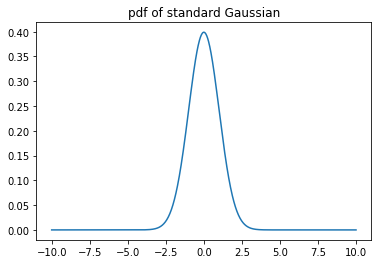

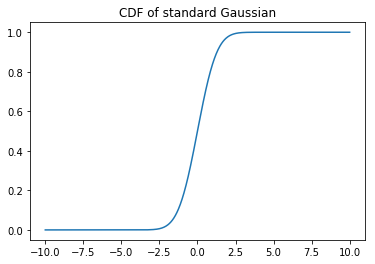

In [25]:
X = st.norm()
x = np.linspace(-10,10,1000)
plt.plot(x,X.pdf(x))
plt.title('pdf of standard Gaussian')
plt.figure()
plt.plot(x,X.cdf(x))
plt.title('CDF of standard Gaussian')

We can also shift and stretch the Gaussian. Notice how the scaling changes when we change the mean and standard deviation.

Text(0.5,1,'CDF of N(3,4) Gaussian')

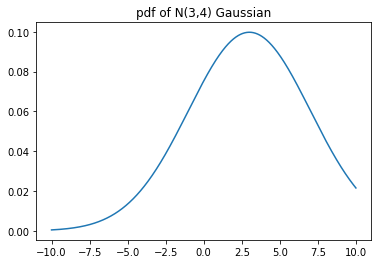

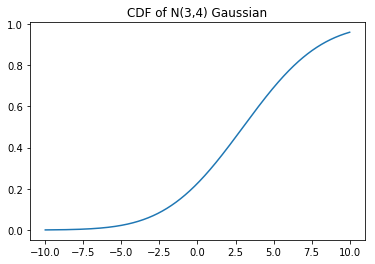

In [24]:
X = st.norm(3,4)
x = np.linspace(-10,10,1000)
plt.plot(x,X.pdf(x))
plt.title('pdf of N(3,4) Gaussian')
plt.figure()
plt.plot(x,X.cdf(x))
plt.title('CDF of N(3,4) Gaussian')

The Gaussian distribution is one of the most frequently used distributions due to the central limit theorem (CLT).  To discuss the CLT, we begin with the law of large numbers (LLN).  The LLN, roughly speaking, tells us that if $X_1, X_2, \cdots $ is a sequence of independent and identically distributed random variables with mean $\mu$, and if $S_n =X_1+X_2+\cdots+X_n,$  then, with probability one, $\lim_{n\to\infty}\frac{S_n}{n}=\mu$.   This gives rise to the practical approximation, $S_n \approx n \mu.$   For example, if we roll a fair die 1000 times, the sum of the numbers rolled should be approximately  3,500.   

The CLT gives an important refinement on the LLN.   Roughly speaking, it tells us that $S_n$ as just described tends to have a Gaussian distribution.  If each $X_k$ has mean $\mu$ and variance $\sigma^2,$  then $S_n$ has mean $n\mu$ and variance $n\sigma^2.$   Therefore, the standardized version of $S_n$ is $\frac{S_n-n\mu}{\sqrt{n\sigma^2}}.$  The CLT states that for any constant $c,$
$$
\lim_{n\to\infty}  P\left\{  \frac{S_n-n\mu}{\sqrt{n\sigma^2}} \leq c \right\} = \Phi(c)
$$
In practice, this gives the Gaussian approximation: $S_n$ approximately has the
Gaussian (same as normal) distribution with parameters $n\mu$ and
variance $n\sigma^2.$


In order to visualize this, let's look at sums of Bernoulli random variables. Suppose we have $n$ indpendent Bernoulli random variables, $X_1,X_2,\cdots,X_n$, each with parameter $p$. Recall that the Bernoulli distribution has a mean of $\mu_X=p$ and a variance of $\sigma_X^2=p(1-p)$.  The sum of these random variables, of course, has the the binomial distribution with parameters $n$ and $p$. That is, $S_n=(X_1+X_2+\cdots+X_n) \sim Bin(n,p)$. If we standardize our binomial (using $\mu = np, \sigma^2 = np(1-p)$) we find the following: 

$ \frac{S_n-np}{\sqrt{np(1-p)}}=\frac{S_n-np}{\sqrt{n}\sqrt{p(1-p)}} = \frac{S_n-n\mu_X}{\sqrt{n}\sigma_X}$

By the central limit theorem, the distribution of this goes to the standard normal distribution as n goes to infinity.  (This was the first example of the CLT discovered, and is called the DeMoivre-Laplace limit theorem.)

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Show graphically that as $n$ becomes large, the distribution of the sum of $n$ i.i.d. Bernoulli random variables converges to the normal distribution. To do this use n = 50 and $p = 0.4.$ 

1. Overlay a plot of the pmf of the binomial distribution versus the pdf of a normal distribution with the same mean and variance. Your pmf should be discrete.
2. Overlay a plot of the CDF of the binomial distribution versus the CDF of a normal distribution with the same mean and variance.
3. Comment on what happens as you change $n.$

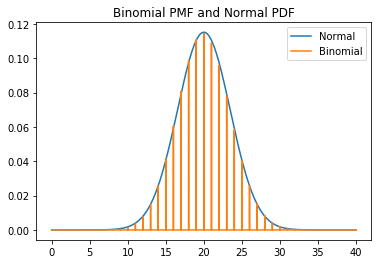

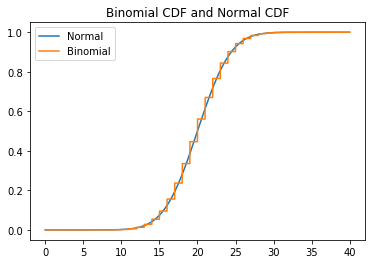

In [28]:
# Your code here
X = st.norm(20, np.sqrt(12))
x = np.linspace(0,40,1000)

n = 50
p = 0.4
binom = st.binom(n,p)
bilin = np.linspace(0,40,10001)

plt.plot(x, X.pdf(x), label="Normal")
plt.plot(bilin, binom.pmf(bilin), label="Binomial")
plt.title('Binomial PMF and Normal PDF')
plt.legend()

#################################################

plt.figure()
plt.plot(x, X.cdf(x), label='Normal')
plt.plot(bilin, binom.cdf(bilin), label='Binomial')
plt.title('Binomial CDF and Normal CDF')
plt.legend()


__Answer:__ As n approaches infinity, the binomial distribution begins to look more and more like the Normal distribution.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

Another way to view the central limit theorem is through statistics. Suppose we have any discrete distribution. For instance, let's go back to our apocalyptic zombie scenario from Lab 6. Recall that the pmf of the number of zombies getting into a building in a given night has  the distribution:

$P\{Z = 5\} = .05$

$P\{Z = 3\} = .1$

$P\{Z = 2\} = .25$

$P\{Z = 1\} = .2$

$P\{Z = 0\} = .05$

$P\{Z = -2\} = .2$

$P\{Z = -3\} = .1$

$P\{Z = -4\} = .05$

We're assuming that this pmf is the same each night. Suppose that an anti-Zombie coalition has been formed across campus and includes 150 buildings (all with the same distribution). One of the survivors just happens to be a statistician who wants to assess the campus's survival capability. He goes to each building each night for twenty nights, and observes how many zombies enter.  For each building he calculates the average number of Zombies per night that he saw enter the building.  This results in 150 averages of 20 random variates each. 

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** 

1. Create a histogram of the averages across the buildings with the number of bins being equal to the square root of the number of buildings. 
2. Answer the following questions: Is your histogram approximately normally distributed? What happens as you increase the number of buildings? What happens as you increase the number of nights observed? 

Text(0,0.5,'Building Count')

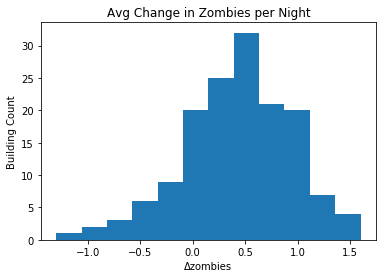

In [44]:
# Your code here
z = [5,3,2,1,0,-2,-3,-4]
p = [.05,.1,.25,.2,.05,.2,.1,.05]
X = st.rv_discrete(values=(z,p))
nights = 20
builds = 150
zombis = []

for i in range(builds):
    temp = []
    for j in range(nights):
        temp.append(X.rvs())
    temp2 = np.average(temp)
    zombis.append(temp2)
    
plt.hist(zombis, bins=(int)(np.sqrt(builds)))
plt.title('Avg Change in Zombies per Night')
plt.xlabel('Δzombies')
plt.ylabel('Building Count')

__Answer__: My histogram looks _very roughly_ normally distributed.  When I increase the number of buildings, my histogram appears to approach a true Normal distribution.  When I increase the number of nights, the histogram becomes extremely narrow as the distribution will "huddle" around the true mean.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Change Detection:

Often complex systems or machines have sensors to monitor the health of the machine.  The sensor outputs might be modeled as iid with some pmf $p_o$ as long as the system is in good condition,  and iid with some other pmf $p_1$ if the system has changed in some way (such as system failure, intruder present, etc).    A detection rule observes the data and raises the alarm at some time $\tau.$  Ideally the alarm time $\tau$ is always greater than, but not much greater than, the system change time. One approach to this problem is to fix a window length $W$ and divide time into a sequence of nonoverlapping time windows.  At the end of each window we perform a binary hypothesis test to decide if the data in the window was generated by $p_0$
or $p_1.$  If the decision is to decide in favor of $p_1$ the alarm is raised, so that $\tau$ is the time at the end of the window.   This scenario is simulated below.   Try running the simulation muliple times.  Try experimenting by varying the detection threshold and window size.  You might notice that sometimes the log likelihood ratio crosses above the threshold in the middle of a window, but the alarm isn't sounded because the likelihood ratio is tested only at the end of a window.

Window Size= 30 LRT threshold= 5.0
System change detected with time to detection 96


Text(0.5,0,'time')

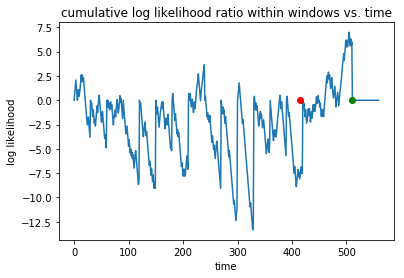

In [47]:
# Window method for change detection
N_max=1000 # maximum number of observations allowed
gamma=np.random.randint(0,700)  # time of system change
W=30  # window length, initally W=30
threshold=5.0   # detection threshold, initally 5.0
p0=np.array([0.2,0.2,0.4,0.2])
p1=np.array([0.4,0.3,0.2,0.1])
if np.size(p0)!=np.size(p1):
    print ("warning, p0 and p1 have different sizes")

# Observations will have pmf p0 for times 1 through gamma - 1, pmf p1 afterwards
def f(i):
    return np.log(p1[i]/p0[i])

c=np.arange(np.size(p0))
Xcstm0 = st.rv_discrete(values=(c,p0))   # scipy.stats object for distibution p0
Xcstm1 = st.rv_discrete(values=(c,p1))   # scipy.stats object for distibution p1

variates=np.column_stack([Xcstm0.rvs(size=N_max),Xcstm1.rvs(size=N_max)])  #Nmax x 2 array
log_LR=np.zeros(N_max+1)  # log_LR will store the sequence of log likelihood ratios

t=0
alarm_flag=0
while (t<N_max-1):
    t=t+1
    if t<gamma:
        log_LR[t]=log_LR[t-1]+f(variates[t,0])
    else:
        log_LR[t]=log_LR[t-1]+f(variates[t,1])                             
    
    if t % W==0:    # if t is a multiple of W, time to do an LRT
        if log_LR[t] > threshold:
            alarm_flag=1
            alarm_time=t
            break
        else:    # Reset LR
            log_LR[t]=0.
            
print ("Window Size=",W,"LRT threshold=",threshold)

if alarm_flag==0:
    print ("Time N_max reached with no alarm")
else:
    if (alarm_time < gamma):
        print ("False alarm at time", alarm_time)
    else:
        print ("System change detected with time to detection", alarm_time-gamma)
        
plt.plot(log_LR[0:alarm_time+50])
plt.plot(gamma,0,'ro')   # Time of system change indicated by red dot
plt.plot(alarm_time,0,'go')   # Alarm time indicated by green dot
plt.title('cumulative log likelihood ratio within windows vs. time')
plt.ylabel('log likelihood')
plt.xlabel('time')

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Run the above simulation 1,000 times. Calculate and print out: 

1. the experimental probability of a false alarm
2. the mean time to detection given that the false alarm does not happen. 

If failure is not detected use $N_{max}-\gamma$ for detection time. (Again, it's probably in your best interest not to plot a graph for each trial).

In [51]:
# Your code here
facount = 0
time = []
threshold=5.0   # detection threshold, initally 5.0
for i in range(1000):
    gamma=np.random.randint(0,700)  # time of system change
    t=0
    alarm_flag=0
    variates=np.column_stack([Xcstm0.rvs(size=N_max),Xcstm1.rvs(size=N_max)])  #Nmax x 2 array
    log_LR=np.zeros(N_max+1)  # log_LR will store the sequence of log likelihood ratios
    while (t<N_max-1):
        t=t+1
        if t<gamma:
            log_LR[t]=log_LR[t-1]+f(variates[t,0])
        else:
            log_LR[t]=log_LR[t-1]+f(variates[t,1])                             
        
        if t % W==0:    # if t is a multiple of W, time to do an LRT
            if log_LR[t] > threshold:
                alarm_flag=1
                alarm_time=t
                break
            else:    # Reset LR
                log_LR[t]=0.
    if(alarm_flag == 0):
         time.append(N_max - gamma)
    else:
        if(alarm_time < gamma):
            facount += 1
        else:
            time.append(alarm_time - gamma)

print(facount / 1000)
print(np.average(time))

0.009
56.527749747729565


__Answer__: The experimental probability of a false alarm is 0.009 and the average detection time given that a false alarm does not happen is 56.5277.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

Longer window sizes in the above method of change detection can lead to more accurate hypothesis testing (reducing the probability of false alarm and/or increasing the probability of detection during a given window after system change occurs), but longer window sizes can also lead to larger time to detection because after the system change we have to wait at least until the next window boundary (or the one after that) to get a detection.   An alternative method, called the *cumulative sum* method, is to continually update the log likelihood ratio, but reseting it to zero whenever it goes negative, and sounding the alarm whenever it crosses above a threshold.  Note that a somewhat larger threshold should be used for the cumulative sum algorithm to offset the fact that the negative values of log likelihood are bumped up to zero.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** 

1. Implement the cumulative sum algorithm for the same pair of distributions and same distribution of system change time $\gamma$ as above.   Adjust the threshold for the cumulative sum algorithm to get approximately the same probability of false alarm as for the window method above (this may require some trial and error). 
2. Print out the probability of false alarm. Estimate the resulting mean time to detection and print it out.  
3. Comment on how it differs from the average we found above. 

In [65]:
# Your code here
facount = 0
time = []
threshold=8.5   # detection threshold, initally 5.0
for i in range(1000):
    gamma=np.random.randint(0,700)  # time of system change
    t=0
    alarm_flag=0
    variates=np.column_stack([Xcstm0.rvs(size=N_max),Xcstm1.rvs(size=N_max)])  #Nmax x 2 array
    log_LR=np.zeros(N_max+1)  # log_LR will store the sequence of log likelihood ratios
    while (t<N_max-1):
        t=t+1
        if t<gamma:
            log_LR[t]=log_LR[t-1]+f(variates[t,0])
        else:
            log_LR[t]=log_LR[t-1]+f(variates[t,1])                             
        
        #if t % W==0:    # if t is a multiple of W, time to do an LRT
        if (log_LR[t] > threshold):
                alarm_flag=1
                alarm_time=t
                break
        elif (log_LR[t] < 0):    # Reset LR
                log_LR[t]=0.
    if(alarm_flag == 0):
         time.append(N_max - gamma)
    else:
        if(alarm_time < gamma):
            facount += 1
        else:
            time.append(alarm_time - gamma)

print(facount / 1000)
print(np.average(time))

0.009
38.43895055499495


__Answer:__ With a threshold of 8.5, we achieve the same false alarm experimental probability of 0.009.  The average detection time for this was significantly lower, though, coming in at 38.4389.  

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

## Binary Hypothesis Testing for Multidimensional Gaussian Distributions:

In ECE 313 we consider the bivariate Gaussian distribution.  It is a joint distribution for two random variables, $X_1,X_2$ and is uniquely determined by five parameters, the means of the two random variables, $m_1$ and $m_2$, the variances of the two random variables, and the covariance between the two random variables defined by $\mbox{Cov}(X_1,X_2)=E[(X_1-m_1)(X_2-m_2)].$ 
By the way, note that $\mbox{Cov}(X_1,X_1)=\mbox{Var}(X_1,X_1).$   Equivalently,
we can think of $\binom{X_1}{X_2}$ as a random vector, with mean $\binom{m_1}{m_2}$ and covariance matrix
$\Sigma=\left( \begin{array}  \mbox{Cov}(X_1,X_1) & \mbox{Cov}(X_1,X_2)\\ \mbox{Cov}(X_2,X_1) & \mbox{Cov}(X_2,X_2) \end{array}\right).$
Joint normal (also known as joint Gaussian) distributions exist in any number of dimensions.   A Guassian distribution in a given number of dimensions is specified uniquely by a mean vector and a covariance matrix.  The following code generates variates for two normal distributions.  The orange triangles follow a distribution that is rotationally symmetric about the origin.   The blue circles follow a distribution with positive correlation between the two coordinates; the shape of the blue blob of points is elongated along a line of slope one.  Also, the mean vector for the blue points is $\binom{2.0}{0}$ so the blue blob is offset a bit to the right of the orange blob.   Try running the code a few times to see the variation.   To get a better idea of the shapes, try increasing the number of samples to 1000.   Now suppose you were to have 50 samples generated from one of the two distributions. That is, you get to see either 50 orange points or 50 blue points, but with the colors removed.  How well do you think the maximum likelihood decision rule could detect which distribution was used to generate the points?  (This is stated as a problem for you to work out,  below.)

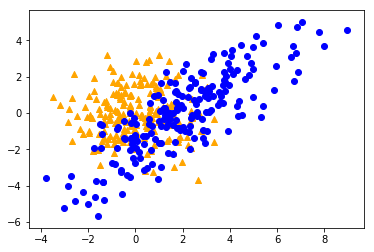

In [66]:
dim=2  # Dimension of the random vectors
num_samples=200
Sigma0=2.0*np.identity(dim)    # identity matrix
Sigma1=np.identity(dim)+ 4.0*np.ones([dim,dim])   # some positive correlation added
mu0=np.zeros(dim)
mu1=np.zeros(dim)
mu1[0]=2.0  # first coordinate has nonzero mean under H1
variates0= multivariate_normal.rvs(mu0,Sigma0,num_samples)
variates1= multivariate_normal.rvs(mu1,Sigma1,num_samples)
plt.scatter(variates0[:,0],variates0[:,1],color='orange',marker='^')
plt.scatter(variates1[:,0],variates1[:,1],color='blue')
# plt.plot.scatter(variates2)
plt.show()

The following code runs a ML detection rule on simulated multidimensional Gaussian random vectors of any finite dimension. It is very similar to the code used for hypothesis testing at the beginning of Lab 9.  The difference is that here two multivariate normal pdfs are used instead of two discrete distributions.

In [67]:
#   Simulation of ML detection rule for two multidimensional Gaussian distibutions
#

dim = 3  # Dimension of the random vectors
num_samples = 10
Sigma0 = np.identity(dim)    # identity matrix
Sigma1 = np.identity(dim)+ 0.5*np.ones([dim,dim])   # some positive correlation added
mu0 = np.zeros(dim)
mu1 = np.ones(dim)*0.1   #  small nonzero mean under H1

dist0 = multivariate_normal(mu0, Sigma0) # multivariate_normal was imported from Scipy
dist1 = multivariate_normal(mu1, Sigma1)

Htrue=np.random.randint(2)  # Sets the true hypothesis to be 0 or 1.

if Htrue==0:     # generate num_samples random variates using the true hypothesis
    variates = dist0.rvs(num_samples) # num_samples x dim array, each row is random variate   
else:
    variates = dist1.rvs(num_samples)   # num_samples x dim array, each row is random variate

print ("Data is generated using true hypothesis H",Htrue ,":  ")
print (variates)

log_LR=0.0   # log_LR will become the log likelihood ratio 
for count in range(num_samples):
    log_LR += np.log(dist1.pdf(variates[count,:])/dist0.pdf(variates[count,:]))
    
if log_LR >= 0:
    print ("log_LR=", log_LR, ">=0; declare H1 is true")
else: print ("log_LR=", log_LR, "<0; declare H0 is true")

if (log_LR >=0) and (Htrue==0):
    print ("False Alarm occured")
if (log_LR <0) and (Htrue==1):
    print ("Miss occured")

Data is generated using true hypothesis H 0 :  
[[ 0.54390066  2.22428754  0.92115252]
 [-1.22782099 -1.37708993  1.65793036]
 [-0.26121972  1.53795161  2.52691984]
 [ 1.70817476  0.29885783  1.2881301 ]
 [ 0.55231791 -0.78746882 -0.42862232]
 [ 1.12225406  0.33001779 -0.08811562]
 [ 0.43770463 -0.3918601   0.87593423]
 [-0.3485589  -1.03689473 -1.43152893]
 [-0.16479378  0.87199285 -0.4890629 ]
 [-0.75436094  0.77765341 -0.57920313]]
log_LR= 0.8185969802927562 >=0; declare H1 is true
False Alarm occured


<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 5:</SPAN>** Adapt the above code to the case of 50 samples of bivariate gaussian random variable using the parameters of the orange and blue scatter plots shown above. Run the simulation 1,000 times to estimate and print out the probability of a false alarm and the probability of a miss.

In [68]:
# Your code here
#Simulation of ML detection rule for two multidimensional Gaussian distibutions
fa = miss = 0
for i in range(1000):
    dim = 3  # Dimension of the random vectors
    num_samples = 10
    Sigma0 = np.identity(dim)    # identity matrix
    Sigma1 = np.identity(dim)+ 0.5*np.ones([dim,dim])   # some positive correlation added
    mu0 = np.zeros(dim)
    mu1 = np.ones(dim)*0.1   #  small nonzero mean under H1
    
    dist0 = multivariate_normal(mu0, Sigma0) # multivariate_normal was imported from Scipy
    dist1 = multivariate_normal(mu1, Sigma1)
    
    Htrue=np.random.randint(2)  # Sets the true hypothesis to be 0 or 1.
    
    if Htrue==0:     # generate num_samples random variates using the true hypothesis
        variates = dist0.rvs(num_samples) # num_samples x dim array, each row is random variate   
    else:
        variates = dist1.rvs(num_samples)   # num_samples x dim array, each row is random variate
    
    #print ("Data is generated using true hypothesis H",Htrue ,":  ")
    #print (variates)
    
    log_LR=0.0   # log_LR will become the log likelihood ratio 
    for count in range(num_samples):
        log_LR += np.log(dist1.pdf(variates[count,:])/dist0.pdf(variates[count,:]))
        
#    if log_LR >= 0:
#        print ("log_LR=", log_LR, ">=0; declare H1 is true")
#    else: print ("log_LR=", log_LR, "<0; declare H0 is true")
    
    if (log_LR >=0) and (Htrue==0):
        #print ("False Alarm occured")
        fa += 1
    if (log_LR <0) and (Htrue==1):
        #print ("Miss occured")
        miss += 1
        
print(fa, miss)

60 99


__Answer:__ 

P(miss) ≈ 0.099

P(false alarm) ≈ 0.06

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 5</SPAN>**

## Lab Questions:

For this weeks lab, please answer all questions 1-5.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 